<a href="https://colab.research.google.com/github/vladcudris/tlc-article/blob/master/voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data = {
    "LAYERHEIGTH": [0.21, 0.21, 0.21, 0.10, 0.10, 0.10, 0.30, 0.30, 0.30, 0.19, 0.19, 0.19, 0.12, 0.12, 0.28, 0.28, 0.28, 0.14, 0.14, 0.14, 0.17, 0.26, 0.26, 0.21, 0.21, 0.10, 0.10, 0.30, 0.30, 0.19, 0.19, 0.12, 0.12, 0.28, 0.28, 0.28, 0.14, 0.14, 0.14, 0.17, 0.17, 0.17, 0.23, 0.23, 0.23, 0.26, 0.26, 0.26],
    "WALLTHICKNESS": [0.78, 0.78, 0.78, 0.96, 0.96, 0.96, 0.82, 0.82, 0.82, 1.00, 1.00, 1.00, 0.60, 0.60, 0.64, 0.64, 0.64, 0.69, 0.69, 0.69, 0.87, 0.73, 0.73, 0.78, 0.78, 0.96, 0.96, 0.82, 0.82, 1.00, 1.00, 0.60, 0.60, 0.64, 0.64, 0.64, 0.69, 0.69, 0.69, 0.87, 0.87, 0.87, 0.91, 0.91, 0.91, 0.73, 0.73, 0.73],
    "TOPBOTTOMTHICKNESS": [0.87, 0.87, 0.87, 0.80, 0.80, 0.80, 0.73, 0.73, 0.73, 1.00, 1.00, 1.00, 0.53, 0.53, 0.93, 0.93, 0.93, 0.40, 0.40, 0.40, 0.47, 0.67, 0.67, 0.87, 0.87, 0.80, 0.80, 0.73, 0.73, 1.00, 1.00, 0.53, 0.53, 0.93, 0.93, 0.93, 0.40, 0.40, 0.40, 0.47, 0.47, 0.47, 0.60, 0.60, 0.60, 0.67, 0.67, 0.67],
    "TOPBOTTOMLINEDIRECTION1": [140.00, 140.00, 140.00, 80.00, 80.00, 80.00, 0.00, 0.00, 0.00, 60.00, 60.00, 60.00, 160.00, 160.00, 20.00, 20.00, 20.00, 100.00, 100.00, 100.00, 40.00, 180.00, 180.00, 140.00, 140.00, 80.00, 80.00, 0.00, 0.00, 60.00, 60.00, 160.00, 160.00, 20.00, 20.00, 20.00, 100.00, 100.00, 100.00, 40.00, 40.00, 40.00, 120.00, 120.00, 120.00, 180.00, 180.00, 180.00],
    "TOPBOTTOMLINEDIRECTION2": [80.00, 80.00, 80.00, 40.00, 40.00, 40.00, 0.00, 0.00, 0.00, 120.00, 120.00, 120.00, 140.00, 140.00, 180.00, 180.00, 180.00, 20.00, 20.00, 20.00, 160.00, 60.00, 60.00, 80.00, 80.00, 40.00, 40.00, 0.00, 0.00, 120.00, 120.00, 140.00, 140.00, 180.00, 180.00, 180.00, 20.00, 20.00, 20.00, 160.00, 160.00, 160.00, 100.00, 100.00, 100.00, 60.00, 60.00, 60.00],
    "INFILLDENSITY": [64.44, 64.44, 64.44, 91.11, 91.11, 91.11, 28.89, 28.89, 28.89, 55.56, 55.56, 55.56, 46.67, 46.67, 100.00, 100.00, 100.00, 37.78, 37.78, 37.78, 82.22, 73.33, 73.33, 64.44, 64.44, 91.11, 91.11, 28.89, 28.89, 55.56, 55.56, 46.67, 46.67, 100.00, 100.00, 100.00, 37.78, 37.78, 37.78, 82.22, 82.22, 82.22, 20.00, 20.00, 20.00, 73.33, 73.33, 73.33],
    "INFILLLINEDIRECTION1": [60.00, 60.00, 60.00, 180.00, 180.00, 180.00, 20.00, 20.00, 20.00, 120.00, 120.00, 120.00, 140.00, 140.00, 160.00, 160.00, 160.00, 0.00, 0.00, 0.00, 100.00, 40.00, 40.00, 60.00, 60.00, 180.00, 180.00, 20.00, 20.00, 120.00, 120.00, 140.00, 140.00, 160.00, 160.00, 160.00, 0.00, 0.00, 0.00, 100.00, 100.00, 100.00, 80.00, 80.00, 80.00, 40.00, 40.00, 40.00],
    "INFILLLINEDIRECTION2": [20.00, 20.00, 20.00, 160.00, 160.00, 160.00, 40.00, 40.00, 40.00, 0.00, 0.00, 0.00, 100.00, 100.00, 120.00, 120.00, 120.00, 80.00, 80.00, 80.00, 140.00, 60.00, 60.00, 20.00, 20.00, 160.00, 160.00, 40.00, 40.00, 0.00, 0.00, 100.00, 100.00, 120.00, 120.00, 120.00, 80.00, 80.00, 80.00, 140.00, 140.00, 140.00, 180.00, 180.00, 180.00, 60.00, 60.00, 60.00],
    "WORKSPACETEM": [46.67, 46.67, 46.67, 36.67, 36.67, 36.67, 33.33, 33.33, 33.33, 30.00, 30.00, 30.00, 50.00, 50.00, 40.00, 40.00, 40.00, 56.67, 56.67, 56.67, 60.00, 53.33, 53.33, 46.67, 46.67, 36.67, 36.67, 33.33, 33.33, 30.00, 30.00, 50.00, 50.00, 40.00, 40.00, 40.00, 56.67, 56.67, 56.67, 60.00, 60.00, 60.00, 43.33, 43.33, 43.33, 53.33, 53.33, 53.33],
    "EXTRUSIONTEMP": [190, 190, 190, 200, 200, 200, 194, 194, 194, 205, 205, 205, 198, 198, 203, 203, 203, 212, 212, 212, 216, 197, 197, 190, 190, 200, 200, 194, 194, 205, 205, 198, 198, 203, 203, 203, 212, 212, 212, 216, 216, 216, 190, 190, 190, 197, 197, 197],
    "BEDTEMP": [70, 70, 70, 61, 61, 61, 67, 67, 67, 63, 63, 63, 65, 65, 56, 56, 56, 54, 54, 54, 52, 50, 50, 70, 70, 61, 61, 67, 67, 63, 63, 65, 65, 56, 56, 56, 54, 54, 54, 52, 52, 52, 58, 58, 58, 50, 50, 50],
    "PRINTSPEED": [44.444444, 44.444444, 44.444444, 62.222222, 62.222222, 62.222222, 66.666667, 66.666667, 66.666667, 40, 40, 40, 57.777778, 57.777778, 48.888889, 48.888889, 48.888889, 75.555556, 75.555556, 75.555556, 80, 71.111111, 71.111111, 44.444444, 44.444444, 62.222222, 62.222222, 66.666667, 66.666667, 40, 40, 57.777778, 57.777778, 48.888889, 48.888889, 48.888889, 75.555556, 75.555556, 75.555556, 80, 80, 80, 53.333333, 53.333333, 53.333333, 71.111111, 71.111111, 71.111111],
    "POSICION": ["P1", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P1", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P2", "P2", "P3", "P2", "P3", "P1", "P2", "P1", "P3", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3"],
    "MATERIAL": ["PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA"],
    "INFILL PATTER": ["LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI"],
    "E": [297.67, 257.6, 313.81, 159.84, 250.53, 157.8, 111.23, 134.83, 183.15, 325.94, 130.14, 181.84, 158.22, 139.26, 284.12, 265.26, 151.94, 152.21, 176.58, 141.56, 246.61, 233.79, 335.36, 177.979, 145.087, 149.89, 216.658, 113.085, 125.575, 120.131, 87.1127, 70.854, 79.1752, 171.355, 46.9832, 120.478, 76.2668, 60.7775, 149.625, 154.638, 185.304, 188.386, 175.497, 174.332, 130.555, 191.986, 209.495, 234.704, 279.822]
}

df = pd.DataFrame(data)

# Creating the interactive Voronoi diagram
fig = px.scatter(df, x='LAYERHEIGTH', y='WALLTHICKNESS', color='E',
                 hover_data=['POSICION', 'MATERIAL', 'INFILL PATTER', 'E'],
                 labels={
                     'LAYERHEIGTH': 'Layer Height',
                     'WALLTHICKNESS': 'Wall Thickness',
                     'E': 'Response Variable E'
                 },
                 title="Interactive Voronoi Diagram")

fig.update_traces(marker=dict(size=10, line=dict(width=2, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Showing the plot
fig.show()


NameError: name 'pd' is not defined

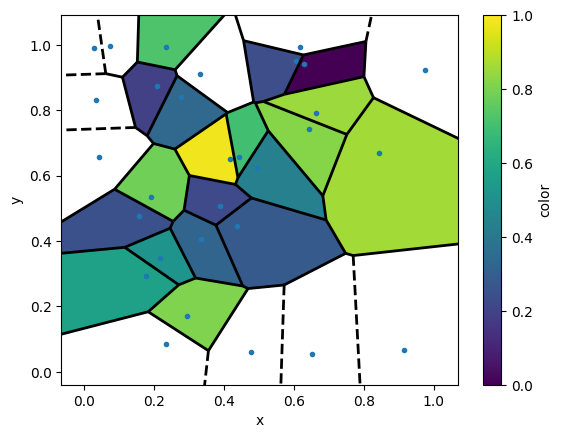

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np

def create_voronoi_plot(data, x_var, y_var, color_var):
    # Verificar que las variables seleccionadas existen en el DataFrame
    if x_var not in data.columns or y_var not in data.columns or color_var not in data.columns:
        raise ValueError("Una o más variables no existen en el DataFrame.")

    # Extraer las variables seleccionadas
    points = data[[x_var, y_var]].values
    colors = data[color_var].values

    # Crear el diagrama de Voronoi
    vor = Voronoi(points)

    # Plotear el diagrama de Voronoi
    fig, ax = plt.subplots()
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='k', line_width=2)

    # Colorear las celdas de Voronoi
    for region, color in zip(vor.regions, colors):
        if not -1 in region and region:
            polygon = [vor.vertices[i] for i in region]
            ax.fill(*zip(*polygon), color=plt.cm.viridis(color / max(colors)))

    # Configurar etiquetas y mostrar el gráfico
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, label=color_var)
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    # Crear un DataFrame de ejemplo
    data = pd.DataFrame({
        'x': np.random.rand(30),
        'y': np.random.rand(30),
        'color': np.random.randint(0, 100, 30)
    })

    # Llamar a la función para crear el gráfico
    create_voronoi_plot(data, 'x', 'y', 'color')


In [ ]:
import numpy as np
from scipy.spatial import Voronoi
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import column
from bokeh.io import push_notebook

output_notebook()

# Generar puntos aleatorios
points = np.random.rand(10, 2)

# Crear el diagrama de Voronoi
vor = Voronoi(points)

# Extraer los segmentos de las aristas del diagrama de Voronoi
lines = []
for simplex in vor.ridge_vertices:
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        lines.append([(vor.vertices[i, 0], vor.vertices[i, 1]) for i in simplex])

# Crear una figura de Bokeh
p = figure(title="Diagrama de Voronoi Interactivo", tools="pan,wheel_zoom,reset,save")

# Agregar los puntos
source = ColumnDataSource(data=dict(x=points[:, 0], y=points[:, 1]))
p.circle('x', 'y', size=10, source=source, color='red', alpha=0.6)

# Agregar las aristas del diagrama de Voronoi
for line in lines:
    p.line([line[0][0], line[1][0]], [line[0][1], line[1][1]], line_width=2)

# Agregar una herramienta de información
hover = HoverTool()
hover.tooltips = [("Índice", "$index"), ("(x, y)", "($x, $y)")]
p.add_tools(hover)

# Mostrar la figura
show(p, notebook_handle=True)

# Función para actualizar el diagrama con nuevos puntos
def update():
    global points, vor, lines
    points = np.random.rand(10, 2)
    vor = Voronoi(points)
    lines = []
    for simplex in vor.ridge_vertices:
        simplex = np.asarray(simplex)
        if np.all(simplex >= 0):
            lines.append([(vor.vertices[i, 0], vor.vertices[i, 1]) for i in simplex])
    source.data = dict(x=points[:, 0], y=points[:, 1])
    p.renderers = []
    p.circle('x', 'y', size=10, source=source, color='red', alpha=0.6)
    for line in lines:
        p.line([line[0][0], line[1][0]], [line[0][1], line[1][1]], line_width=2)
    push_notebook()

# Llamar a la función update para actualizar el diagrama
update()


In [2]:
pip install matplotlib pandas scipy ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import ipywidgets as widgets
from IPython.display import display

# Datos proporcionados
data = {
    "LAYERHEIGTH": [0.21, 0.21, 0.21, 0.10, 0.10, 0.10, 0.30, 0.30, 0.30, 0.19, 0.19, 0.19, 0.12, 0.12, 0.28, 0.28, 0.28, 0.14, 0.14, 0.14, 0.17, 0.26, 0.26, 0.21, 0.21, 0.10, 0.10, 0.30, 0.30, 0.19, 0.19, 0.12, 0.12, 0.28, 0.28, 0.28, 0.14, 0.14, 0.14, 0.17, 0.17, 0.17, 0.23, 0.23, 0.23, 0.26, 0.26, 0.26],
    "WALLTHICKNESS": [0.78, 0.78, 0.78, 0.96, 0.96, 0.96, 0.82, 0.82, 0.82, 1.00, 1.00, 1.00, 0.60, 0.60, 0.64, 0.64, 0.64, 0.69, 0.69, 0.69, 0.87, 0.73, 0.73, 0.78, 0.78, 0.96, 0.96, 0.82, 0.82, 1.00, 1.00, 0.60, 0.60, 0.64, 0.64, 0.64, 0.69, 0.69, 0.69, 0.87, 0.87, 0.87, 0.91, 0.91, 0.91, 0.73, 0.73, 0.73],
    "TOPBOTTOMTHICKNESS": [0.87, 0.87, 0.87, 0.80, 0.80, 0.80, 0.73, 0.73, 0.73, 1.00, 1.00, 1.00, 0.53, 0.53, 0.93, 0.93, 0.93, 0.40, 0.40, 0.40, 0.47, 0.67, 0.67, 0.87, 0.87, 0.80, 0.80, 0.73, 0.73, 1.00, 1.00, 0.53, 0.53, 0.93, 0.93, 0.93, 0.40, 0.40, 0.40, 0.47, 0.47, 0.47, 0.60, 0.60, 0.60, 0.67, 0.67, 0.67],
    "TOPBOTTOMLINEDIRECTION1": [140.00, 140.00, 140.00, 80.00, 80.00, 80.00, 0.00, 0.00, 0.00, 60.00, 60.00, 60.00, 160.00, 160.00, 20.00, 20.00, 20.00, 100.00, 100.00, 100.00, 40.00, 180.00, 180.00, 140.00, 140.00, 80.00, 80.00, 0.00, 0.00, 60.00, 60.00, 160.00, 160.00, 20.00, 20.00, 20.00, 100.00, 100.00, 100.00, 40.00, 40.00, 40.00, 120.00, 120.00, 120.00, 180.00, 180.00, 180.00],
    "TOPBOTTOMLINEDIRECTION2": [80.00, 80.00, 80.00, 40.00, 40.00, 40.00, 0.00, 0.00, 0.00, 120.00, 120.00, 120.00, 140.00, 140.00, 180.00, 180.00, 180.00, 20.00, 20.00, 20.00, 160.00, 60.00, 60.00, 80.00, 80.00, 40.00, 40.00, 0.00, 0.00, 120.00, 120.00, 140.00, 140.00, 180.00, 180.00, 180.00, 20.00, 20.00, 20.00, 160.00, 160.00, 160.00, 100.00, 100.00, 100.00, 60.00, 60.00, 60.00],
    "INFILLDENSITY": [64.44, 64.44, 64.44, 91.11, 91.11, 91.11, 28.89, 28.89, 28.89, 55.56, 55.56, 55.56, 46.67, 46.67, 100.00, 100.00, 100.00, 37.78, 37.78, 37.78, 82.22, 73.33, 73.33, 64.44, 64.44, 91.11, 91.11, 28.89, 28.89, 55.56, 55.56, 46.67, 46.67, 100.00, 100.00, 100.00, 37.78, 37.78, 37.78, 82.22, 82.22, 82.22, 20.00, 20.00, 20.00, 73.33, 73.33, 73.33],
    "INFILLLINEDIRECTION1": [60.00, 60.00, 60.00, 180.00, 180.00, 180.00, 20.00, 20.00, 20.00, 120.00, 120.00, 120.00, 140.00, 140.00, 160.00, 160.00, 160.00, 0.00, 0.00, 0.00, 100.00, 40.00, 40.00, 60.00, 60.00, 180.00, 180.00, 20.00, 20.00, 120.00, 120.00, 140.00, 140.00, 160.00, 160.00, 160.00, 0.00, 0.00, 0.00, 100.00, 100.00, 100.00, 80.00, 80.00, 80.00, 40.00, 40.00, 40.00],
    "INFILLLINEDIRECTION2": [20.00, 20.00, 20.00, 160.00, 160.00, 160.00, 40.00, 40.00, 40.00, 0.00, 0.00, 0.00, 100.00, 100.00, 120.00, 120.00, 120.00, 80.00, 80.00, 80.00, 140.00, 60.00, 60.00, 20.00, 20.00, 160.00, 160.00, 40.00, 40.00, 0.00, 0.00, 100.00, 100.00, 120.00, 120.00, 120.00, 80.00, 80.00, 80.00, 140.00, 140.00, 140.00, 180.00, 180.00, 180.00, 60.00, 60.00, 60.00],
    "WORKSPACETEM": [46.67, 46.67, 46.67, 36.67, 36.67, 36.67, 33.33, 33.33, 33.33, 30.00, 30.00, 30.00, 50.00, 50.00, 40.00, 40.00, 40.00, 56.67, 56.67, 56.67, 60.00, 53.33, 53.33, 46.67, 46.67, 36.67, 36.67, 33.33, 33.33, 30.00, 30.00, 50.00, 50.00, 40.00, 40.00, 40.00, 56.67, 56.67, 56.67, 60.00, 60.00, 60.00, 43.33, 43.33, 43.33, 53.33, 53.33, 53.33],
    "EXTRUSIONTEMP": [190, 190, 190, 200, 200, 200, 194, 194, 194, 205, 205, 205, 198, 198, 203, 203, 203, 212, 212, 212, 216, 197, 197, 190, 190, 200, 200, 194, 194, 205, 205, 198, 198, 203, 203, 203, 212, 212, 212, 216, 216, 216, 190, 190, 190, 197, 197, 197],
    "BEDTEMP": [70, 70, 70, 61, 61, 61, 67, 67, 67, 63, 63, 63, 65, 65, 56, 56, 56, 54, 54, 54, 52, 50, 50, 70, 70, 61, 61, 67, 67, 63, 63, 65, 65, 56, 56, 56, 54, 54, 54, 52, 52, 52, 58, 58, 58, 50, 50, 50],
    "PRINTSPEED": [44.444444, 44.444444, 44.444444, 62.222222, 62.222222, 62.222222, 66.666667, 66.666667, 66.666667, 40, 40, 40, 57.777778, 57.777778, 48.888889, 48.888889, 48.888889, 75.555556, 75.555556, 75.555556, 80, 71.111111, 71.111111, 44.444444, 44.444444, 62.222222, 62.222222, 66.666667, 66.666667, 40, 40, 57.777778, 57.777778, 48.888889, 48.888889, 48.888889, 75.555556, 75.555556, 75.555556, 80, 80, 80, 53.333333, 53.333333, 53.333333, 71.111111, 71.111111, 71.111111],
    "POSICION": ["P1", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P1", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P2", "P2", "P3", "P2", "P3", "P1", "P2", "P1", "P3", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3", "P1", "P2", "P3"],
    "MATERIAL": ["PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA", "PLA"],
    "INFILL PATTER": ["LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "LINES", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI", "TRI"],
    "E": [297.67, 257.6, 313.81, 159.84, 250.53, 157.8, 111.23, 134.83, 183.15, 325.94, 130.14, 181.84, 158.22, 139.26, 284.12, 265.26, 151.94, 152.21, 176.58, 141.56, 246.61, 233.79, 335.36, 177.979, 145.087, 149.89, 216.658, 113.085, 125.575, 120.131, 87.1127, 70.854, 79.1752, 171.355, 46.9832, 120.478, 76.2668, 60.7775, 149.625, 154.638, 185.304, 188.386, 175.497, 174.332, 130.555, 191.986, 209.495, 234.704, 279.822]
}

df = pd.DataFrame(data)

# Función para crear el gráfico de Voronoi
def create_voronoi_plot(x_var, y_var, color_var):
    plt.figure(figsize=(8, 6))

    # Verificar que las variables seleccionadas existen en el DataFrame
    if x_var not in df.columns or y_var not in df.columns or color_var not in df.columns:
        raise ValueError("Una o más variables no existen en el DataFrame.")

    # Extraer las variables seleccionadas
    points = df[[x_var, y_var]].values
    colors = df[color_var].values

    # Crear el diagrama de Voronoi
    vor = Voronoi(points)

    # Plotear el diagrama de Voronoi
    fig, ax = plt.subplots()
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='k', line_width=2)

    # Colorear las celdas de Voronoi
    for region_index in vor.point_region:
        region = vor.regions[region_index]
        if not -1 in region and region:
            polygon = [vor.vertices[i] for i in region]
            color = colors[region_index]
            ax.fill(*zip(*polygon), color=plt.cm.viridis(color / max(colors)))

    # Configurar etiquetas y mostrar el gráfico
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, label=color_var)
    plt.show()

# Widgets para seleccionar variables
x_var_widget = widgets.Dropdown(options=df.columns, description='X Variable:')
y_var_widget = widgets.Dropdown(options=df.columns, description='Y Variable:')
color_var_widget = widgets.Dropdown(options=df.columns, description='Color Variable:')

# Función que se ejecuta cuando se cambian los widgets
def update_plot(x_var, y_var, color_var):
    create_voronoi_plot(x_var, y_var, color_var)

# Interfaz interactiva
interactive_plot = widgets.interactive(update_plot, x_var=x_var_widget, y_var=y_var_widget, color_var=color_var_widget)
display(interactive_plot)


ValueError: All arrays must be of the same length

interactive(children=(Dropdown(description='X Variable:', options=('LAYERHEIGTH', 'WALLTHICKNESS', 'TOPBOTTOMT…

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

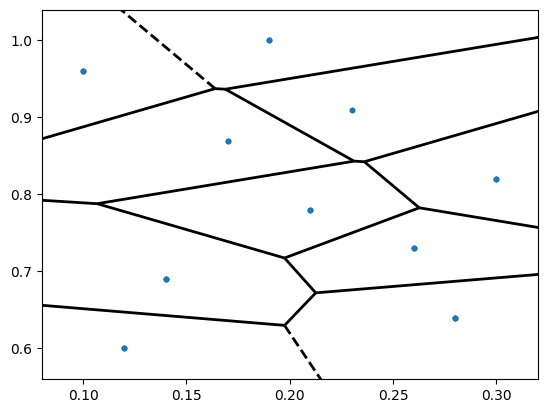

In [7]:
import pandas as pd
from io import StringIO

# Definir el string de datos
data_part1 = """LAYERHEIGTH;WALLTHICKNESS;TOPBOTTOMTHICKNESS;TOPBOTTOMLINEDIRECTION1;TOPBOTTOMLINEDIRECTION2;INFILLDENSITY;INFILLLINEDIRECTION1;INFILLLINEDIRECTION2;WORKSPACETEM;EXTRUSIONTEMP;BEDTEMP;PRINTSPEED;POSICION;MATERIAL;INFILL PATTER;E
0.21;0.78;0.87;140.00;80.00;64.44;60.00;20.00;46.67;190;70;44.444444;P1;PLA;LINES;297.67
0.21;0.78;0.87;140.00;80.00;64.44;60.00;20.00;46.67;190;70;44.444444;P2;PLA;LINES;257.6
0.21;0.78;0.87;140.00;80.00;64.44;60.00;20.00;46.67;190;70;44.444444;P3;PLA;LINES;313.81
0.10;0.96;0.80;80.00;40.00;91.11;180.00;160.00;36.67;200;61;62.222222;P1;PLA;LINES;159.84
0.10;0.96;0.80;80.00;40.00;91.11;180.00;160.00;36.67;200;61;62.222222;P2;PLA;LINES;250.53
0.10;0.96;0.80;80.00;40.00;91.11;180.00;160.00;36.67;200;61;62.222222;P3;PLA;LINES;157.8
0.30;0.82;0.73;0.00;0.00;28.89;20.00;40.00;33.33;194;67;66.666667;P1;PLA;LINES;111.23
0.30;0.82;0.73;0.00;0.00;28.89;20.00;40.00;33.33;194;67;66.666667;P2;PLA;LINES;134.83
0.30;0.82;0.73;0.00;0.00;28.89;20.00;40.00;33.33;194;67;66.666667;P3;PLA;LINES;183.15
0.19;1.00;1.00;60.00;120.00;55.56;120.00;0.00;30.00;205;63;40;P1;PLA;LINES;325.94
0.19;1.00;1.00;60.00;120.00;55.56;120.00;0.00;30.00;205;63;40;P2;PLA;LINES;130.14
0.19;1.00;1.00;60.00;120.00;55.56;120.00;0.00;30.00;205;63;40;P3;PLA;LINES;181.84
0.12;0.60;0.53;160.00;140.00;46.67;140.00;100.00;50.00;198;65;57.777778;P1;PLA;LINES;158.22
0.12;0.60;0.53;160.00;140.00;46.67;140.00;100.00;50.00;198;65;57.777778;P3;PLA;LINES;139.26
0.28;0.64;0.93;20.00;180.00;100.00;160.00;120.00;40.00;203;56;48.888889;P1;PLA;LINES;284.12
0.28;0.64;0.93;20.00;180.00;100.00;160.00;120.00;40.00;203;56;48.888889;P2;PLA;LINES;265.26
0.28;0.64;0.93;20.00;180.00;100.00;160.00;120.00;40.00;203;56;48.888889;P3;PLA;LINES;151.94
0.14;0.69;0.40;100.00;20.00;37.78;0.00;80.00;56.67;212;54;75.555556;P1;PLA;LINES;152.21
0.14;0.69;0.40;100.00;20.00;37.78;0.00;80.00;56.67;212;54;75.555556;P2;PLA;LINES;176.58
0.14;0.69;0.40;100.00;20.00;37.78;0.00;80.00;56.67;212;54;75.555556;P3;PLA;LINES;141.56
0.17;0.87;0.47;40.00;160.00;82.22;100.00;140.00;60.00;216;52;80;P2;PLA;LINES;246.61
"""

data_part2 = """0.26;0.73;0.67;180.00;60.00;73.33;40.00;60.00;53.33;197;50;71.111111;P2;PLA;LINES;233.79
0.26;0.73;0.67;180.00;60.00;73.33;40.00;60.00;53.33;197;50;71.111111;P3;PLA;LINES;335.36
0.21;0.78;0.87;140.00;80.00;64.44;60.00;20.00;46.67;190.00;70.00;44.44;P2;PLA;TRI;177.979
0.21;0.78;0.87;140.00;80.00;64.44;60.00;20.00;46.67;190.00;70.00;44.44;P3;PLA;TRI;145.087
0.10;0.96;0.80;80.00;40.00;91.11;180.00;160.00;36.67;200.00;61.00;62.22;P1;PLA;TRI;149.89
0.10;0.96;0.80;80.00;40.00;91.11;180.00;160.00;36.67;200.00;61.00;62.22;P2;PLA;TRI;216.658
0.30;0.82;0.73;0.00;0.00;28.89;20.00;40.00;33.33;194.00;67.00;66.67;P1;PLA;TRI;113.085
0.30;0.82;0.73;0.00;0.00;28.89;20.00;40.00;33.33;194.00;67.00;66.67;P3;PLA;TRI;125.575
0.19;1.00;1.00;60.00;120.00;55.56;120.00;0.00;30.00;205.00;63.00;40.00;P2;PLA;TRI;120.131
0.19;1.00;1.00;60.00;120.00;55.56;120.00;0.00;30.00;205.00;63.00;40.00;P3;PLA;TRI;87.1127
0.12;0.60;0.53;160.00;140.00;46.67;140.00;100.00;50.00;198.00;65.00;57.78;P1;PLA;TRI;70.854
0.12;0.60;0.53;160.00;140.00;46.67;140.00;100.00;50.00;198.00;65.00;57.78;P2;PLA;TRI;79.1752
0.12;0.60;0.53;160.00;140.00;46.67;140.00;100.00;50.00;198.00;65.00;57.78;P3;PLA;TRI;171.355
0.28;0.64;0.93;20.00;180.00;100.00;160.00;120.00;40.00;203;56;48.888889;P1;PLA;TRI;46.9832
0.28;0.64;0.93;20.00;180.00;100.00;160.00;120.00;40.00;203;56;48.888889;P2;PLA;TRI;120.478
0.28;0.64;0.93;20.00;180.00;100.00;160.00;120.00;40.00;203;56;48.888889;P3;PLA;TRI;76.2668
0.14;0.69;0.40;100.00;20.00;37.78;0.00;80.00;56.67;212;54;75.56;P1;PLA;TRI;60.7775
0.14;0.69;0.40;100.00;20.00;37.78;0.00;80.00;56.67;212;54;75.56;P2;PLA;TRI;149.625
0.14;0.69;0.40;100.00;20.00;37.78;0.00;80.00;56.67;212;54;75.56;P3;PLA;TRI;154.638
0.17;0.87;0.47;40.00;160.00;82.22;100.00;140.00;60.00;216.00;52.00;80.00;P1;PLA;TRI;185.304
0.17;0.87;0.47;40.00;160.00;82.22;100.00;140.00;60.00;216.00;52.00;80.00;P2;PLA;TRI;188.386
0.17;0.87;0.47;40.00;160.00;82.22;100.00;140.00;60.00;216.00;52.00;80.00;P3;PLA;TRI;175.497
0.23;0.91;0.60;120.00;100.00;20.00;80.00;180.00;43.33;190.00;58.00;53.33;P1;PLA;TRI;174.332
0.23;0.91;0.60;120.00;100.00;20.00;80.00;180.00;43.33;190.00;58.00;53.33;P2;PLA;TRI;130.555
0.23;0.91;0.60;120.00;100.00;20.00;80.00;180.00;43.33;190.00;58.00;53.33;P3;PLA;TRI;191.986
0.26;0.73;0.67;180.00;60.00;73.33;40.00;60.00;53.33;197.00;50.00;71.11;P1;PLA;TRI;209.495
0.26;0.73;0.67;180.00;60.00;73.33;40.00;60.00;53.33;197.00;50.00;71.11;P2;PLA;TRI;234.704
0.26;0.73;0.67;180.00;60.00;73.33;40.00;60.00;53.33;197.00;50.00;71.11;P3;PLA;TRI;279.822
"""

# Concatenar las partes y leer el DataFrame
data_string = data_part1 + data_part2
data = pd.read_csv(StringIO(data_string), delimiter=';')

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import ipywidgets as widgets
from IPython.display import display

# Función para crear el gráfico de Voronoi
def create_voronoi_plot(x_var, y_var, color_var):
    plt.figure(figsize=(8, 6))

    # Verificar que las variables seleccionadas existen en el DataFrame
    if x_var not in data.columns or y_var not in data.columns or color_var not in data.columns:
        raise ValueError("Una o más variables no existen en el DataFrame.")

    # Verificar que las variables X e Y no son iguales
    if x_var == y_var:
        raise ValueError("Las variables X e Y no pueden ser iguales.")

    # Extraer las variables seleccionadas
    points = data[[x_var, y_var]].values
    colors = data[color_var].values

    try:
        # Crear el diagrama de Voronoi
        vor = Voronoi(points)

        # Plotear el diagrama de Voronoi
        fig, ax = plt.subplots()
        voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='k', line_width=2)

        # Colorear las celdas de Voronoi
        for region_index in vor.point_region:
            region = vor.regions[region_index]
            if not -1 in region and region:
                polygon = [vor.vertices[i] for i in region]
                color = colors[region_index]
                ax.fill(*zip(*polygon), color=plt.cm.viridis(color / max(colors)))

        # Configurar etiquetas y mostrar el gráfico
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)
        plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, label=color_var)
        plt.show()
    except Exception as e:
        print(f"Error al crear el diagrama de Voronoi: {e}")

# Widgets para seleccionar variables
x_var_widget = widgets.Dropdown(options=data.columns, description='X Variable:')
y_var_widget = widgets.Dropdown(options=data.columns, description='Y Variable:')
color_var_widget = widgets.Dropdown(options=data.columns, description='Color Variable:')

# Función que se ejecuta cuando se cambian los widgets
def update_plot(x_var, y_var, color_var):
    create_voronoi_plot(x_var, y_var, color_var)

# Interfaz interactiva
interactive_plot = widgets.interactive(update_plot, x_var=x_var_widget, y_var=y_var_widget, color_var=color_var_widget)
display(interactive_plot)

